In [ ]:
import numpy as np
import seaborn as sns
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
distributions = dict()



In [ ]:
#Add the power law for some exponents
for exponent in [2.5]:#[2,2.5,3]:
  distributions["power-law $\gamma="+str(exponent)+"$"] = nx.utils.powerlaw_sequence(100000,exponent=exponent)
  distributions["power-law $\gamma="+str(exponent)+"$"] = [int(x) for x in distributions["power-law $\gamma="+str(exponent)+"$"]]

In [ ]:
#Add the poisson for some lambdas
lams=[3,2,1,0.5,0.1]
for lam in lams:
  distributions["poisson $\lambda="+str(lam)+"$"] = np.random.poisson(lam=lam,size=100000)

TypeError: ignored

In [ ]:
#Add the exponentail for some lambdas
scales=[3,2,1,0.5,0.1]
for scale in scales:
  distributions["exponential $\lambda="+str(scale)+"$"] = np.random.exponential(scale=scale,size=100000)
  distributions["exponential $\lambda="+str(scale)+"$"] = [int(x) for x in distributions["exponential $\lambda="+str(scale)+"$"]]

In [ ]:
#Add the log normal for some parameters
means=[0.01,0.1,1] #plus petit se rapproche
sigmas=[1,3,6]

for mean in means:
  for sigma in sigmas:
    distributions["lognormal $\mu="+str(mean)+",\sigma="+str(sigma)+"$"] = np.random.lognormal(mean=mean,sigma=sigma,size=100000)
    distributions["lognormal $\mu="+str(mean)+",\sigma="+str(sigma)+"$"] = [int(x) for x in distributions["lognormal $\mu="+str(mean)+",\sigma="+str(sigma)+"$"]]

In [ ]:
df = pd.DataFrame()
for name,distrib in distributions.items():
  count = collections.Counter(distrib)
  temp = pd.DataFrame()
  temp["k"]=list(count.keys())
  temp["P(k)"]=[x/100000 for x in list(count.values()) if x/100000>0]
  temp["Distribution"]=[name]*len(count)

  df = pd.concat([df,temp])


(0, 10)

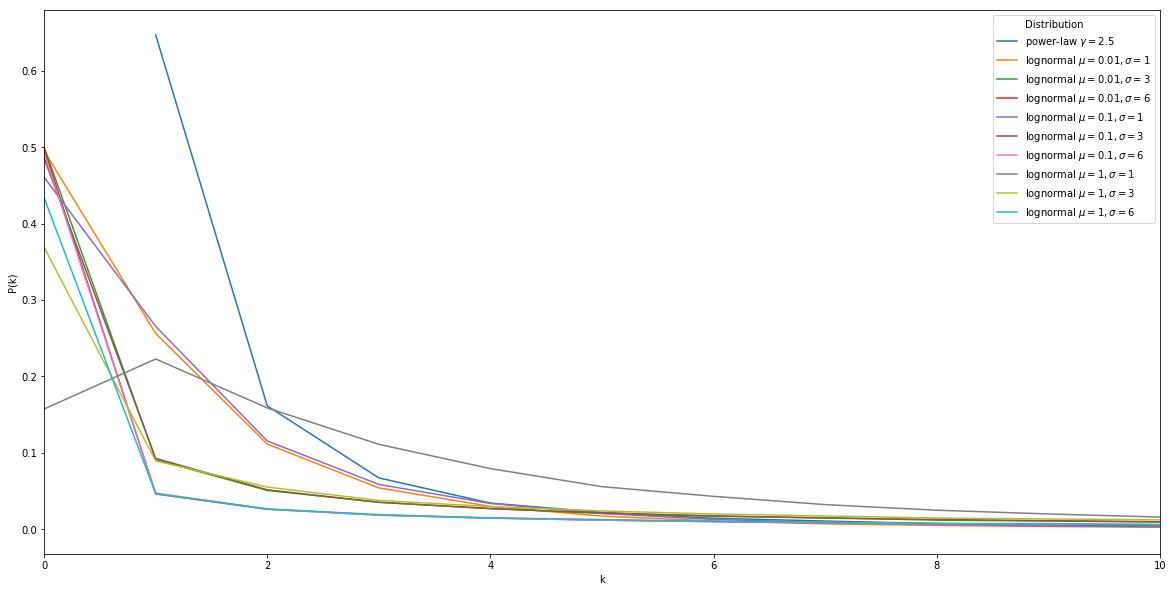

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot("k","P(k)",hue="Distribution",data=df,ax=ax)
ax.set_xlim(0,10)

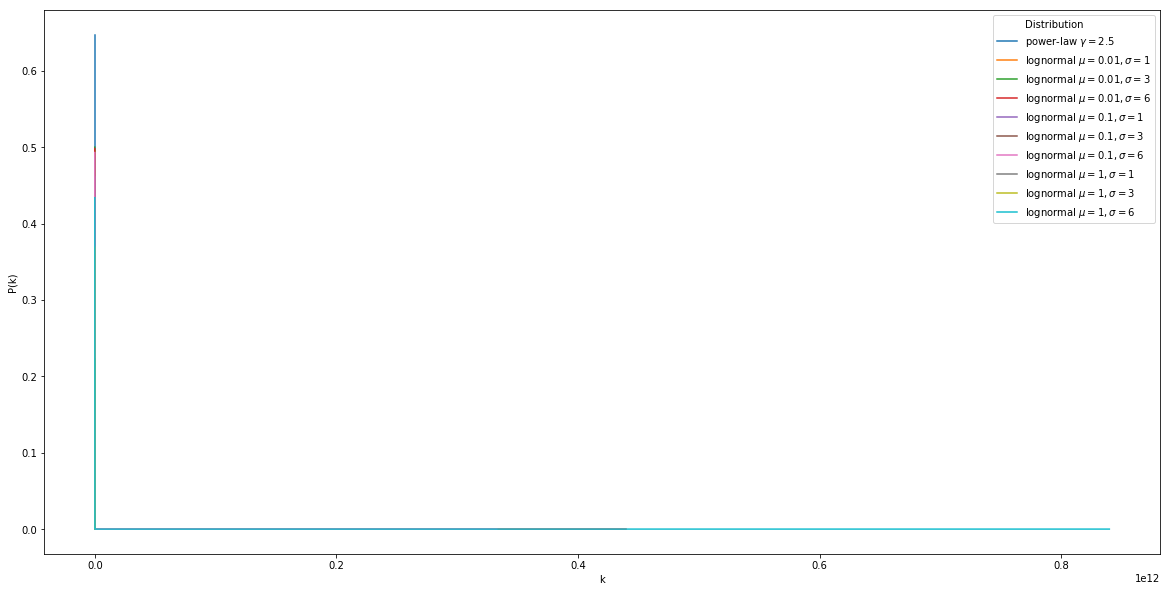

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot("k","P(k)",hue="Distribution",data=df,ax=ax)

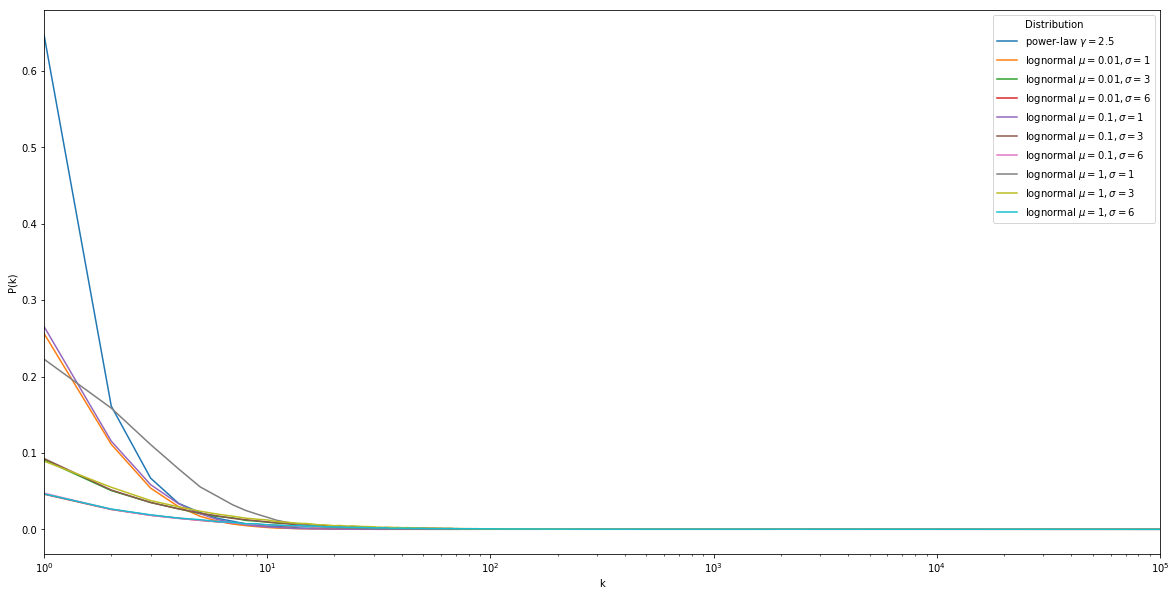

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot("k","P(k)",hue="Distribution",data=df,ax=ax)
ax.set_xlim(1,100000)
#ax.set_yscale('log')
ax.set_xscale('log')
